<a href="https://colab.research.google.com/github/ayucahyarani/CAPSTONEDIGIPRODUCT_PDAB_KELOMPOK2/blob/main/CAPSTONEDIGIPRODUCT_PDAB_KELOMPOK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Klasifikasi Kategori Rumah Berdasarkan Fitur-Fitur Properti untuk Evaluasi Fasilitas Furnishing**

#**Import Library**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import pickle
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari proyek ini adalah meningkatkan pemahaman tentang kategori rumah berdasarkan fitur-fitur properti untuk evaluasi fasilitas furnishing, sehingga memungkinkan penyesuaian strategi pemasaran dan pengembangan properti.

##**Assess Situation**

Situasi bisnis ini muncul karena pentingnya memahami preferensi dan kebutuhan pasar terkait dengan fitur-fitur properti dan fasilitas furnishing dalam industri properti. Analisis ini dilakukan untuk memberikan wawasan yang lebih baik kepada pengembang properti dalam merencanakan dan memasarkan properti mereka.

##**Data Mining Goals**

Tujuan dari penggunaan data mining pada dataset ini adalah untuk mengklasifikasikan kategori rumah berdasarkan fitur-fitur properti dan mengevaluasi preferensi pasar terkait dengan fasilitas furnishing dalam rumah.

##**Project Plan**

Rencana proyek ini dimulai dengan mengumpulkan data, kemudian membersihkan data, dan mengolah data untuk membangun model klasifikasi yang akurat dan dapat dipercaya.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Sumber data: [Housing Price Prediction](https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction)

Dataset yang digunakan berasal dari Kaggle yang menyediakan informasi untuk prediksi harga rumah dengan 13 kolom.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ayucahyarani/CAPSTONEDIGIPRODUCT_PDAB_KELOMPOK2/main/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


##**Describe Data**

###**Informasi Dasar**

In [ ]:
jumlah_baris, jumlah_kolom = df.shape
print("Jumlah baris:", jumlah_baris)
print("Jumlah kolom:", jumlah_kolom)

Jumlah baris: 545
Jumlah kolom: 13


Dataset ini terdiri dari 545 baris data dan 13 kolom yang mengandung informasi seperti harga, luas, jumlah kamar tidur dan kamar mandi, serta fitur-fitur lainnya yang digunakan untuk analisis harga rumah.

###**Informasi Lanjutan**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Dataset memiliki ini 545 baris data yang tidak memiliki nilai null (non-null) untuk setiap kolom. Tipe data kolom-kolom tersebut adalah sebagai berikut:

- Kolom "price", "area", "bedrooms", "bathrooms", "stories", dan "parking" memiliki tipe data integer (int64).
- Kolom "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", dan "furnishingstatus" memiliki tipe data object, yang mungkin merupakan tipe data string atau categorical.

In [ ]:
columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in columns:
    print(df[col].value_counts())
    print()

mainroad
yes    468
no      77
Name: count, dtype: int64

guestroom
no     448
yes     97
Name: count, dtype: int64

basement
no     354
yes    191
Name: count, dtype: int64

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

airconditioning
no     373
yes    172
Name: count, dtype: int64

prefarea
no     417
yes    128
Name: count, dtype: int64

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64



Output di atas menunjukkan jumlah kemunculan nilai dalam setiap kolom kategorikal dalam dataset. Contohnya, pada kolom "mainroad", terdapat 468 rumah terhubung ke jalan utama dan 77 rumah tidak terhubung ke jalan utama.

###**Informasi Statistik Deskriptif**

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Output di atas memberikan ringkasan statistik dari kolom-kolom numerik dalam dataset, seperti price, area, bedrooms, bathrooms, stories, dan parking. Contohnya, pada kolom "price", nilai minimum adalah 1.750.000, nilai maksimum adalah 13.300.000, dengan rata-rata sekitar 4.766.729 dan standar deviasi sekitar 1.870.440. Quartil ketiga adalah sekitar 5.740.000, yang berarti 75% data memiliki harga di bawah nilai ini. Medannya adalah sekitar 4.340.000, yang menunjukkan nilai tengah dari data harga rumah.

##**Exploratory Data Analysis**

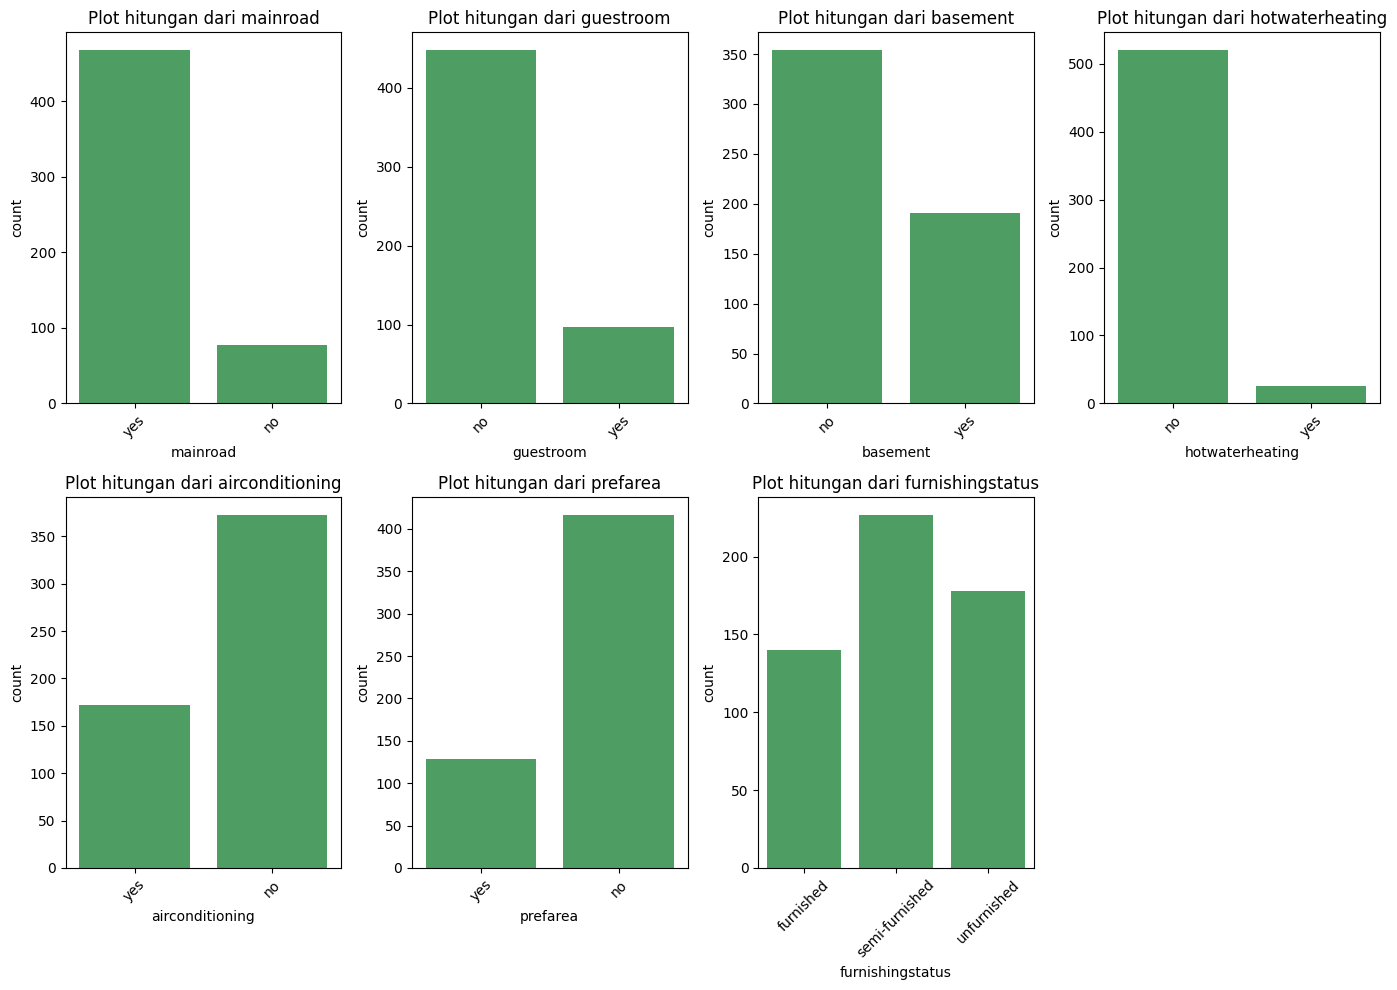

In [ ]:
# Bar chart untuk variabel kategorikal
categorical_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
plt.figure(figsize=(14, 10))
for var in categorical_vars:
    plt.subplot(2, 4, categorical_vars.index(var) + 1)
    sns.countplot(data=df, x=var, color='#41ab5d')
    plt.title(f'Plot hitungan dari {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bar chart di atas menunjukkan jumlah data untuk variabel kategorikal. Setiap kategori diwakili oleh batang dengan ketinggian yang proporsional dengan jumlah datanya. Contohnya, pada kolom "mainroad". Batang tertinggi menunjukkan bahwa sebagian besar properti berada di dekat jalan utama.

In [ ]:
# Pie Chart untuk persentase status furnitur
custom_palette = ['#005a32', '#41ab5d', '#a1d99b']
fig = px.pie(df['furnishingstatus'].value_counts().reset_index(),
             names=df['furnishingstatus'].value_counts().index,
             values=df['furnishingstatus'].value_counts().values,
             title='Persentase Status Furnitur',
             color_discrete_sequence=custom_palette)
fig.show()

Pie Chart di atas menunjukkan persentase dari status furnitur. Kategori "semi-furnished" memiliki persentase terbesar dalam data, mencapai 41.7%. Sementara itu, kategori "unfurnished" dan "furnished" memiliki persentase masing-masing 32.7% dan 25.7%.

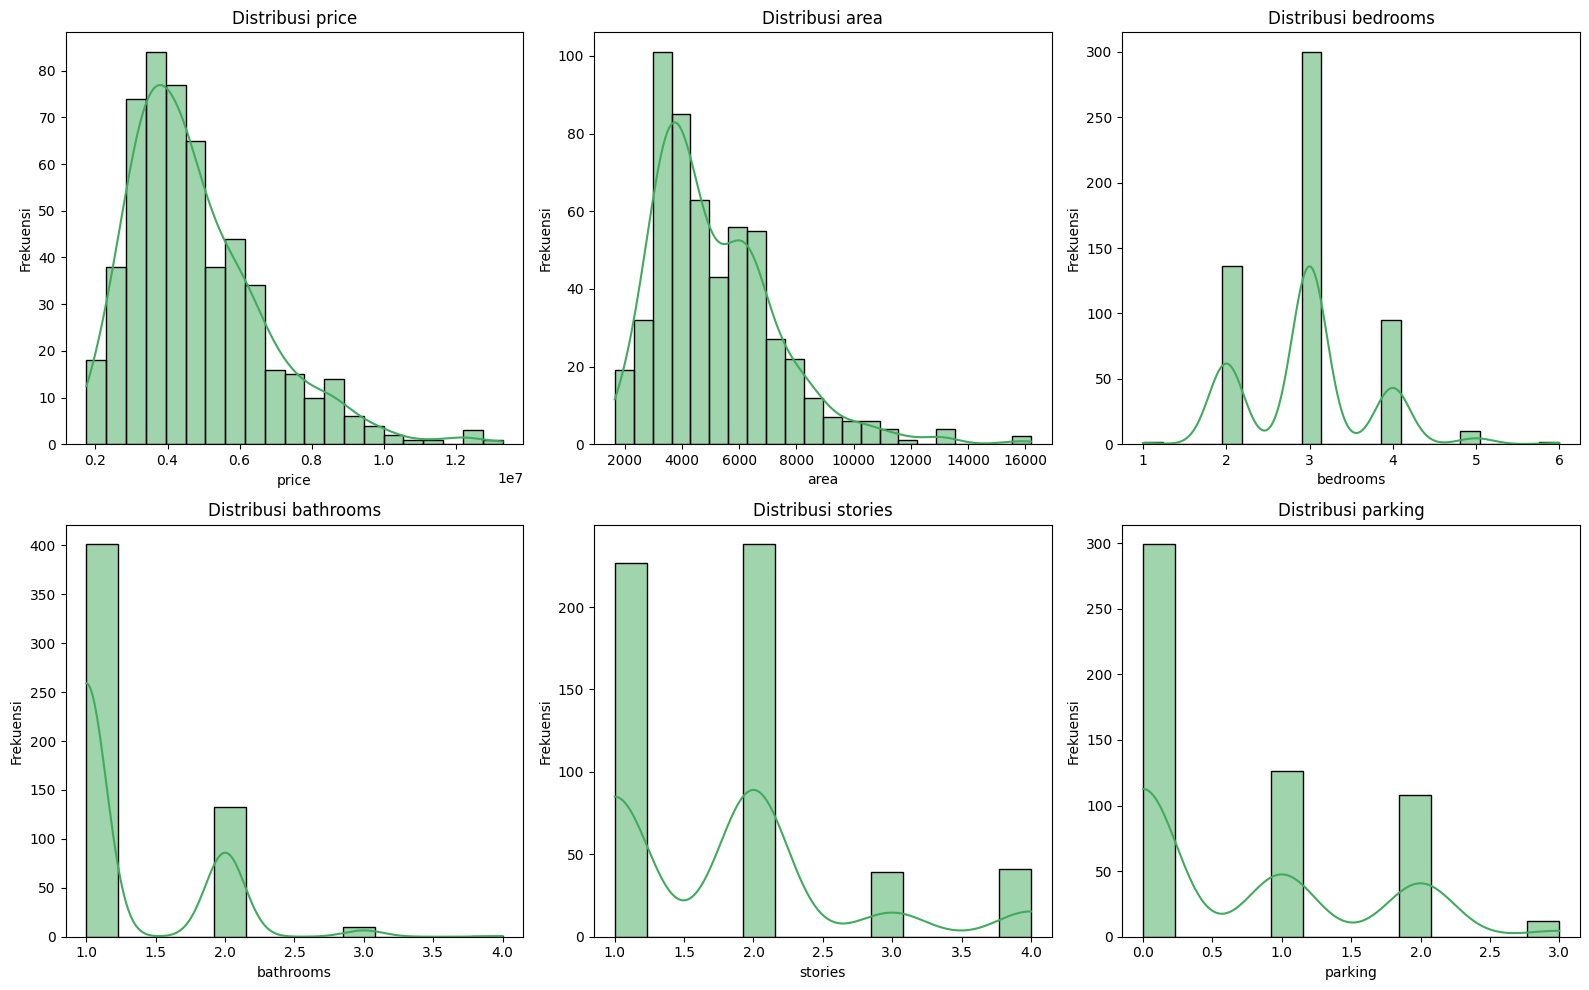

In [ ]:
# Histogram untuk variabel numerik
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
if len(numerical_columns) < 2:
    print("Error: At least two numerical columns are required for heatmap generation.")
else:
    plt.figure(figsize=(16, 10))
    for i, var in enumerate(numerical_columns):
        plt.subplot(2, 3, i+1)
        sns.histplot(df[var], kde=True, color='#41ab5d')
        plt.title(f'Distribusi {var}')
        plt.xlabel(var)
        plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

Histogram di atas menunjukkan beberapa distribusi data untuk variabel numerik. Contohnya, histogram pertama menunjukkan distribusi harga di mana terdapat lebih banyak titik data pada harga yang lebih rendah dan frekuensi titik data menurun seiring dengan kenaikan harga.

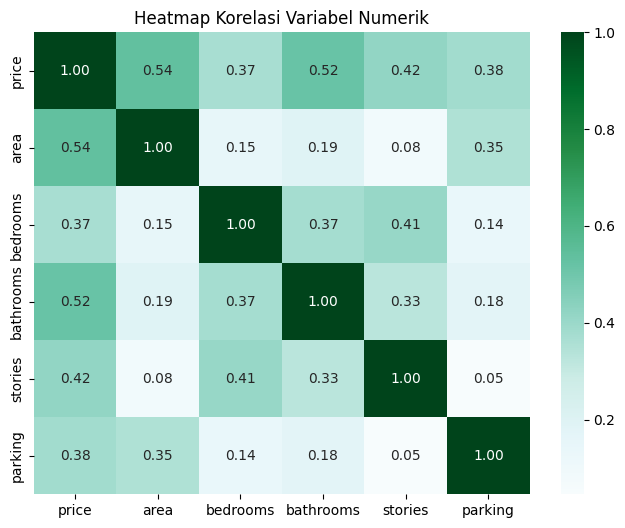

In [ ]:
# Heatmap untuk melihat korelasi antara variabel numerik
numerical_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
correlation_matrix = df[numerical_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='BuGn', fmt=".2f")
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

Heatmap di atas menunjukkan korelasi antara variabel-variabel numerik dalam data. Contohnya, "price" dan "area" memiliki korelasi positif menunjukkan bahwa semakin besar luas rumah semakin tinggi pula harganya.

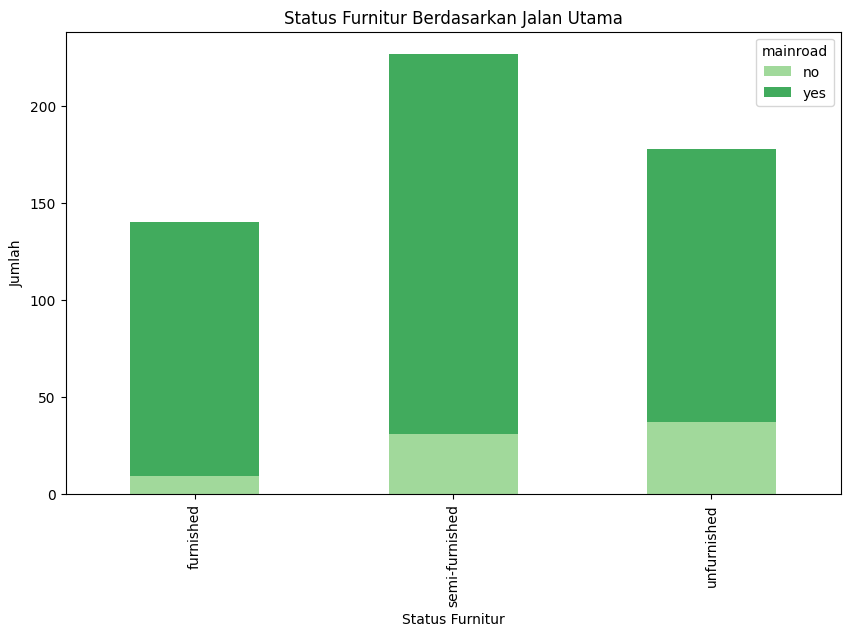

In [ ]:
# Stacked Bar Plot untuk jumlah properti berdasarkan status furnitur dan jalan utama
df_grouped = df.groupby(['furnishingstatus', 'mainroad']).size().unstack()
ax = df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#a1d99b', '#41ab5d'])
ax.set_xlabel('Status Furnitur')
ax.set_ylabel('Jumlah')
ax.set_title('Status Furnitur Berdasarkan Jalan Utama')
plt.legend(title='mainroad')
plt.show()

Stacked bar plot di atas menunjukkan jumlah furnitur untuk properti yang ada pada data berdasarkan jalan utama. Contohnya, kategori "semi-furnished" memiliki properti yang sebagian besar berada di dekat jalan utama.

##**Verify Data Quality**

###**Missing Values**

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio'])

,Null Ratio
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


Output di atas menujukkan bahwa dalam dataset ini setiap kolom dan baris memiliki nilai yang terisi lengkap. Tidak ada bagian dari dataset yang kosong atau tidak memiliki nilai.

###**Outliers Values**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
price,2.752294
area,2.201835
bedrooms,2.201835
bathrooms,0.183486
stories,7.522936
parking,2.201835


Output di atas menunjukkan persentasi outliers pada kolom numerik dalam data. Terlihat bahwa semua kolom memiliki outlier yang berarti, terdapat sebagian kecil dari data pada kolom yang berada di luar jangkauan nilai yang dianggap normal berdasarkan kuartil data.

###**Duplicated Values**

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

Output di atas menunjukkan bahwa dalam dataset ini setiap baris data memiliki kombinasi nilai yang unik untuk setiap kolomnya, jadi tidak ada baris data yang dianggap duplikat.

###**Inconsistent Values / Noise**

In [ ]:
for column in df.columns:
    print(f"Column: {column}")
    unique_values_count = len(df[column].unique())
    print(f"Jumlah Nilai Unik: {unique_values_count}")
    print()

Column: price
Jumlah Nilai Unik: 219

Column: area
Jumlah Nilai Unik: 284

Column: bedrooms
Jumlah Nilai Unik: 6

Column: bathrooms
Jumlah Nilai Unik: 4

Column: stories
Jumlah Nilai Unik: 4

Column: mainroad
Jumlah Nilai Unik: 2

Column: guestroom
Jumlah Nilai Unik: 2

Column: basement
Jumlah Nilai Unik: 2

Column: hotwaterheating
Jumlah Nilai Unik: 2

Column: airconditioning
Jumlah Nilai Unik: 2

Column: parking
Jumlah Nilai Unik: 4

Column: prefarea
Jumlah Nilai Unik: 2

Column: furnishingstatus
Jumlah Nilai Unik: 3



Output di atas menunjukkan jumlah nilai unik dalam setiap kolom pada data, seperti price,	area,	bedrooms, bathrooms, dan fasilitas lainnya, dengan beberapa kolom memiliki jumlah nilai unik yang berbeda-beda.

#**DATA PREPARATION**

##**Data Cleaning**

##**Penanganan Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
price,2.752294
area,2.201835
bedrooms,2.201835
bathrooms,0.183486
stories,7.522936
parking,2.201835


Output di atas menunjukkan persentasi outliers pada kolom numerik dalam data. Terlihat bahwa semua kolom memiliki outlier yang berarti, terdapat sebagian kecil dari data pada kolom yang berada di luar jangkauan nilai yang dianggap normal berdasarkan kuartil data.

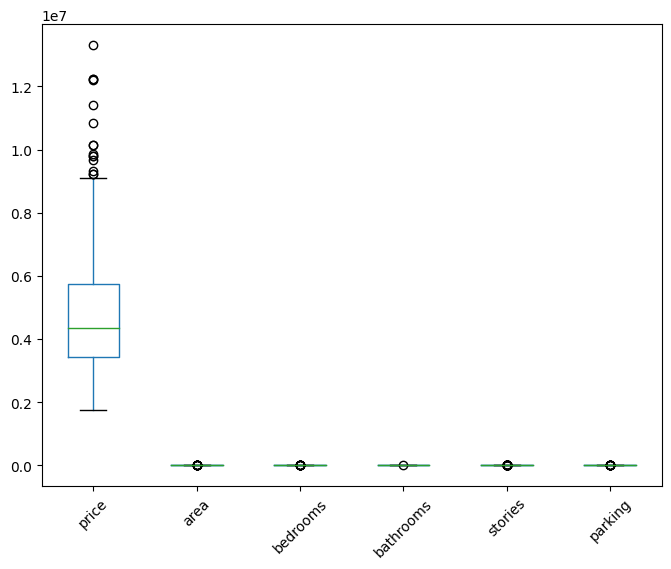

In [ ]:
boxplot = df.boxplot(grid=False, rot=45,  figsize=(8,6))

Output di atas menujukkan pola persebaran data atau nilai outliers. Terlihat jika kolom "price" memiliki nilai outliers yang terlihat sebagai titik-titik di luar "whiskers" (jangkauan dalam box plot). Outliers ini menunjukkan adanya nilai-nilai yang sangat berbeda dari mayoritas data dalam kolom "price".

####**Imputasi Outliers**

Melakukan flooring dan capping pada kolom "price" untuk mengatasi outliers dalam data. Proses ini dilakukan dengan menggunakan kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk menghitung rentang antarkuartil (IQR). Nilai batas bawah (lower_whisker) dan batas atas (upper_whisker) kemudian dihitung menggunakan IQR dan faktor pemanjangan 1.5. Nilai-nilai di bawah batas bawah akan diganti dengan batas bawah itu sendiri, sementara nilai-nilai di atas batas atas akan diganti dengan batas atasnya.

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['price']=np.where(df['price']>upper_whisker,upper_whisker,np.where(df['price']<lower_whisker,lower_whisker,df['price']))

####**Pengecekkan Ulang**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
price,0.000000
area,2.201835
bedrooms,2.201835
bathrooms,0.183486
stories,7.522936
parking,2.201835


Output di atas menunjukkan persentasi outliers pada kolom numerik dalam data. Terlihat bahwa nilai outliers pada kolom "price" sudah berubah menjadi 0 yang berarti tidak ada nilai outliers yang terdeteksi.

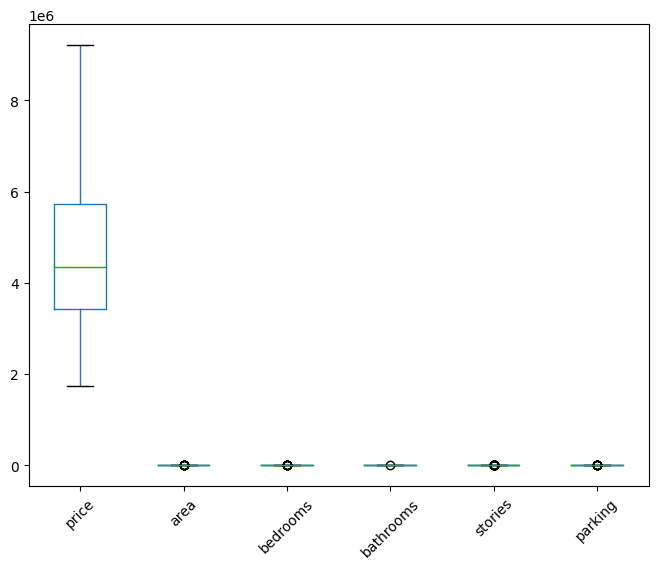

In [ ]:
boxplot = df.boxplot(grid=False, rot=45,  figsize=(8,6))

Output di atas meunjukkan pola persebaran data atau nilai outliers. Dengan fokus pada kolom "price" terlihat bahwa setelah melakukan penanganan outliers, tidak ada nilai yang jauh dari nilai-nilai lainnya, yang menunjukkan bahwa tidak ada lagi outliers yang signifikan dalam kolom "price"

##**Construct Data**

###**Melakukan Rekayasa Fitur**

Setelah melakukan analisis pada dataset ini, tidak ditemukan kolom atau fitur yang memerlukan rekayasa fitur tambahan. Semua fitur yang ada dalam dataset telah relevan untuk analisis yang dilakukan terkait klasifikasi kategori rumah berdasarkan fitur-fitur properti. Oleh karena itu, tidak diperlukan lagi rekayasa fitur tambahan untuk meningkatkan kualitas analisis atau kinerja model. Data tersebut sudah cukup lengkap dan sesuai untuk analisis yang sedang dilakukan.

###**Pengecekkan Hasil**

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000.0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,9205000.0,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9205000.0,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,9205000.0,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,9205000.0,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


##**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [ ]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

Berdasarkan hasil analisis data, ditemukan bahwa tidak ada fitur yang dianggap kurang relevan dalam dataset. Setiap fitur yang ada dalam dataset memiliki potensi untuk memberikan wawasan yang berharga tentang klasifikasi kategori rumah berdasarkan fitur-fitur properti. Oleh karena itu, tidak dilakukan pengurangan pada fitur-fitur dalam dataset karena dianggap bahwa semua fitur tersebut dapat memberikan wawasan dalam analisis yang sedang dilakukan.

###**Pengecekkan Hasil**

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000.0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,9205000.0,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9205000.0,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,9205000.0,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,9205000.0,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


##**Data Transformation**

###**Mapping**

In [ ]:
df.mainroad = df.mainroad.map({"yes":1,"no":0})
df.guestroom = df.guestroom.map({"yes":1,"no":0})
df.basement = df.basement.map({"yes":1,"no":0})
df.hotwaterheating = df.hotwaterheating.map({"yes":1,"no":0})
df.airconditioning = df.airconditioning.map({"yes":1,"no":0})
df.prefarea = df.prefarea.map({"yes":1,"no":0})
df.furnishingstatus = df.furnishingstatus.map({"unfurnished":0, "semi-furnished":1, "furnished":2})

Mapping dilakukan untuk mengubah nilai kategorikal dalam dataset menjadi nilai numerik yang dapat diproses oleh model. Dalam kasus ini, setiap kolom dengan nilai kategorikal seperti mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, dan furnishingstatus diubah menjadi nilai numerik. Misalnya, kategori seperti 'yes' dan 'no' diubah menjadi 1 dan 0, sementara kategori lainnya diubah menjadi angka sesuai dengan urutan atau tingkatannya.

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000.0,7420,4,2,3,1,0,0,0,1,2,1,2
1,9205000.0,8960,4,4,4,1,0,0,0,1,3,0,2
2,9205000.0,9960,3,2,2,1,0,1,0,0,2,1,1
3,9205000.0,7500,4,2,2,1,0,1,0,1,3,1,2
4,9205000.0,7420,4,1,2,1,1,1,0,1,2,0,2


Output di atas menunjukkan hasil dari proses mapping nilai kategorikal ke nilai numerik dalam dataset. Setiap kolom yang sebelumnya berisi nilai kategorikal sekarang telah diubah menjadi nilai numerik sesuai dengan aturan yang ditetapkan dalam proses mapping.

###**Encoding**

In [ ]:
df = pd.get_dummies(df)

Kode diatas digunakan untuk mengonversi variabel kategorikal dalam DataFrame menjadi bentuk biner, di mana setiap nilai kategorikal menjadi kolom baru dengan nilai biner (0 atau 1), yang membantu dalam analisis dan pemodelan data.

###**Pengecekkan Hasil**

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000.0,7420,4,2,3,1,0,0,0,1,2,1,2
1,9205000.0,8960,4,4,4,1,0,0,0,1,3,0,2
2,9205000.0,9960,3,2,2,1,0,1,0,0,2,1,1
3,9205000.0,7500,4,2,2,1,0,1,0,1,3,1,2
4,9205000.0,7420,4,1,2,1,1,1,0,1,2,0,2


Output di atas menujukkan hasil dari proses encoding yang dilakukan terhadap DataFrame awal. Jika suatu baris memiliki nilai tertentu dalam variabel kategorikal, maka kolom yang sesuai dengan nilai tersebut akan memiliki nilai 1, sedangkan kolom-kolom lainnya akan memiliki nilai 0.

##**Konversi DataFrame**

In [ ]:
#df.to_csv('Cleaned_Housing.csv', index=False)

#**MODELLING**

Tahap modelling dilakukan dengan permodelan klastering (associate) dan klasifikasi (predict). Pada permodelan klastering digunakan algoritma K-Means untuk mengelompokkan rumah-rumah berdasarkan kesamaan fitur yang dapat membantu mengidentifikasi pola-pola yang mungkin sulit terlihat secara manual. Kemudian, pada teknik permodelan klasifikasi digunakan algoritma Gaussian Naive Bayes (GNB) dan K-Nearest Neighbors (KNN) untuk memprediksi kategori furnishing berdasarkan fitur-fitur yang telah dikelompokkan.

##**Modelling Associate**

###**Inisiasi Variabel untuk Menyimpan Dataframe**

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/ayucahyarani/CAPSTONEDIGIPRODUCT_PDAB_KELOMPOK2/main/Cleaned_Housing.csv')
df2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000.0,7420,4,2,3,1,0,0,0,1,2,1,2
1,9205000.0,8960,4,4,4,1,0,0,0,1,3,0,2
2,9205000.0,9960,3,2,2,1,0,1,0,0,2,1,1
3,9205000.0,7500,4,2,2,1,0,1,0,1,3,1,2
4,9205000.0,7420,4,1,2,1,1,1,0,1,2,0,2


###**Pre-Processing**

####**Validasi Silang**

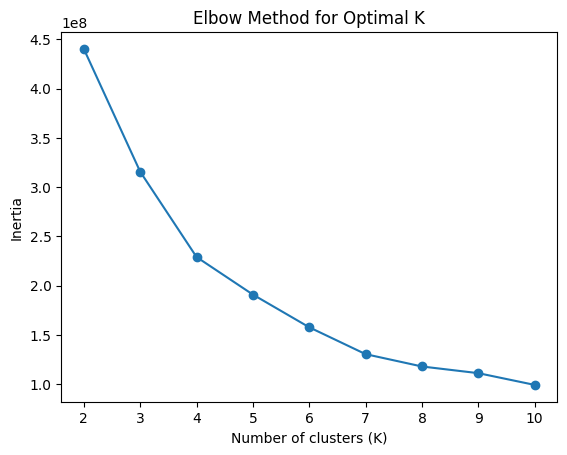

In [ ]:
def kmeans(X, k):
    centroids = [X.iloc[np.random.choice(len(X))].values]
    while len(centroids) < k:
        distances = np.array([min(np.linalg.norm(x - c) ** 2 for c in centroids) for x in X.values])
        probabilities = distances / distances.sum()
        next_centroid = X.iloc[np.random.choice(len(X), p=probabilities)].values
        centroids.append(next_centroid)
    centroids = np.array(centroids)

    distances = np.sqrt(((X.values - centroids[:, np.newaxis])**2).sum(axis=2))
    labels = np.argmin(distances, axis=0)
    new_centroids = np.array([X.values[labels == i].mean(axis=0) for i in range(k)])

    while not np.allclose(centroids, new_centroids):
        centroids = new_centroids
        distances = np.sqrt(((X.values - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        new_centroids = np.array([X.values[labels == i].mean(axis=0) for i in range(k)])

    inertia = np.sum(np.min(distances, axis=0))
    return inertia, labels

inertia_values = []
k_range = range(2, 11)

for k in k_range:
    inertia, _ = kmeans(df2, k)
    inertia_values.append(inertia)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()


Output di atas menunjukkan grafik Elbow, terlihat bahwa jumlah kluster optimal untuk dalam algoritma KMeans adalah 4. Hal ini ditunjukkan oleh titik siku (elbow) pada kurva inersia, di mana terdapat perubahan kemiringan yang signifikan.

###**Build Model**


####**K-Means**

In [ ]:
features = df2[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]

mean_features = features.mean()
std_features = features.std()
std_features[std_features == 0] = 1

df_norm = (features - mean_features) / std_features
df_norm.replace([np.inf, -np.inf], np.nan, inplace=True)
df_norm.dropna(inplace=True)

k = 3
centroids = df_norm.sample(k, random_state=42)

max_iterations = 100
for i in range(max_iterations):
    distances = pd.DataFrame(index=df_norm.index)
    for j in range(k):
        dist = np.sum((df_norm - centroids.iloc[j])**2, axis=1)
        distances[f'distance_to_{j}'] = dist.astype(float)

    cluster_labels = distances.idxmin(axis=1)
    cluster_labels = cluster_labels.map(lambda x: int(x.lstrip("distance_to_")))

    new_centroids = pd.DataFrame(index=range(k), columns=df_norm.columns)
    for j in range(k):
        new_centroids.iloc[j] = df_norm[cluster_labels == j].mean()

    if centroids.equals(new_centroids):
        break
    centroids = new_centroids.copy()

df2 = df2.loc[df_norm.index]
df2["cluster"] = cluster_labels

df2.rename(columns={'cluster': 'kmeans_cluster'}, inplace=True)

print("\ncluster sizes:")
print(df2["kmeans_cluster"].value_counts())


cluster sizes:
kmeans_cluster
2    301
1    176
0     68
Name: count, dtype: int64


Output di atan menunjukkan  jumlah claster 3 digunakan dalam proses k-means clustering untuk mengkategorikan rumah ke dalam tiga kelas: cheap, medium, dan expensive.

In [ ]:
cluster_means = df2.groupby('kmeans_cluster')['price'].mean()

cheap_threshold = cluster_means.quantile(0.25)
expensive_threshold = cluster_means.quantile(0.75)

cheap_cluster = cluster_means[cluster_means <= cheap_threshold].index.tolist()
medium_cluster = cluster_means[(cluster_means > cheap_threshold) & (cluster_means < expensive_threshold)].index.tolist()
expensive_cluster = cluster_means[cluster_means >= expensive_threshold].index.tolist()

def categorize_cluster(cluster):
    if cluster in cheap_cluster:
        return 'cheap'
    elif cluster in medium_cluster:
        return 'medium'
    elif cluster in expensive_cluster:
        return 'expensive'

df2['cluster_category'] = df2['kmeans_cluster'].apply(categorize_cluster)

df2.groupby('cluster_category').agg({
    'price': ['count', 'mean', 'min', 'max']
})

price                                    
                 count          mean        min        max
cluster_category                                          
cheap              301  3.697395e+06  1750000.0  6475000.0
expensive          176  6.537341e+06  3395000.0  9205000.0
medium              68  4.602037e+06  1960000.0  9205000.0

Output di atas menunjukkan informasi kategori kluster berdasarkan harga properti.


####**Visualisasi**

In [ ]:
# Pie Chart untuk jumlah kategori klaster
cluster_category_counts = df2['cluster_category'].value_counts()
custom_palette = ['#005a32', '#41ab5d', '#a1d99b']
fig = px.pie(cluster_category_counts.reset_index(),
             names=cluster_category_counts.index,
             values=cluster_category_counts.values,
             title='Distribusi Kategori Klaster',
             color_discrete_sequence=custom_palette)
fig.show()

Pie Chart di atas menunjukkan persentase dari Jumalah kategori kluster. Kategori "cheap" memiliki persentase terbesar dalam data, mencapai 55.2%. Sementara itu, kategori "expensive" dan "medium" memiliki persentase masing-masing 32.2% dan 12.5%.

###**Begins and Compare Clusters**

In [ ]:
df2["kmeans_cluster"] = cluster_labels

df3 = df2.copy()
df2.drop(columns=['kmeans_cluster'], inplace=True)

df3.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,kmeans_cluster,cluster_category
0,9205000.0,7420,4,2,3,1,0,0,0,1,2,1,2,1,expensive
1,9205000.0,8960,4,4,4,1,0,0,0,1,3,0,2,1,expensive
2,9205000.0,9960,3,2,2,1,0,1,0,0,2,1,1,1,expensive
3,9205000.0,7500,4,2,2,1,0,1,0,1,3,1,2,1,expensive
4,9205000.0,7420,4,1,2,1,1,1,0,1,2,0,2,1,expensive


Output di atas menunjukkan bahwa label cluster yang merupakan hasil klastering telah ditambahkan ke DataFrame

###**Konversi DataFrame**

In [ ]:
#df3.to_csv('Modelling_K-Means.csv', index=False)

##**Modelling Predict**

###**Inisiasi Variabel untuk Menyimpan Dataframe**

In [ ]:
df4 = pd.read_csv('https://raw.githubusercontent.com/ayucahyarani/CAPSTONEDIGIPRODUCT_PDAB_KELOMPOK2/main/Modelling_K-Means.csv')
df4.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,kmeans_cluster
0,9205000.0,7420,4,2,3,1,0,0,0,1,2,1,2,1
1,9205000.0,8960,4,4,4,1,0,0,0,1,3,0,2,1
2,9205000.0,9960,3,2,2,1,0,1,0,0,2,1,1,1
3,9205000.0,7500,4,2,2,1,0,1,0,1,3,1,2,1
4,9205000.0,7420,4,1,2,1,1,1,0,1,2,0,2,1


###**Pre-Processing**

####**Split Data**

In [ ]:
X = df4.drop(["kmeans_cluster"], axis=1)
y = df4["kmeans_cluster"]

In [ ]:
def manual_train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    num_samples = len(X)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)

    test_size = int(test_size * num_samples)

    X_train = X.iloc[indices[:-test_size]]
    X_test = X.iloc[indices[-test_size:]]
    y_train = y.iloc[indices[:-test_size]]
    y_test = y.iloc[indices[-test_size:]]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = manual_train_test_split(X, y, test_size=0.2, random_state=42)

Kode di atas menunjukkan proses pemisahan data, yang mana kolom 'kmeans_cluster' digunakan sebagai kolom target atau variabel yang ingin diprediksi. Proses ini bertujuan untuk memisahkan dataset menjadi data latih dan data uji serta memisahkan fitur-fitur dari variabel target.

In [ ]:
X_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
8,9205000.0,8100,4,1,2,1,1,1,0,1,2,1,2
326,3990000.0,4100,4,1,1,0,0,1,0,0,0,0,0
344,3850000.0,3850,2,1,1,1,0,0,0,0,0,0,1
64,7000000.0,11175,3,1,1,1,0,1,0,1,1,1,2
300,4200000.0,4079,3,1,3,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6755000.0,6000,4,2,4,1,0,0,0,1,0,0,0
106,6160000.0,5450,4,2,1,1,0,1,0,1,0,1,1
270,4340000.0,4500,3,2,3,1,0,0,1,0,1,0,2
435,3290000.0,4040,2,1,1,1,0,0,0,0,0,0,0


Output di atas menunjukkan fitur-fitur dari data uji yang akan digunakan untuk menguji kinerja model yang telah dilatih.

In [ ]:
y_test

8      1
326    0
344    2
64     1
300    2
      ..
71     1
106    1
270    0
435    2
102    1
Name: kmeans_cluster, Length: 109, dtype: int64

Output di atas menunjukkan variabel target dari data uji yang akan digunakan untuk menguji kinerja model yang telah dilatih.

####**Adjusment**

In [ ]:
print("Fitur X_train:", X_train.columns)
print("Fitur df4:", df4.columns)

Fitur X_train: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
Fitur df4: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'kmeans_cluster'],
      dtype='object')


Output di atas digunakan untuk mengecek fitur pada X_train dan fitur pada df4.

In [ ]:
if 'kmeans_cluster' in df4.columns:
    df5 = df4.drop(columns=['kmeans_cluster'])
df5.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000.0,7420,4,2,3,1,0,0,0,1,2,1,2
1,9205000.0,8960,4,4,4,1,0,0,0,1,3,0,2
2,9205000.0,9960,3,2,2,1,0,1,0,0,2,1,1
3,9205000.0,7500,4,2,2,1,0,1,0,1,3,1,2
4,9205000.0,7420,4,1,2,1,1,1,0,1,2,0,2


Output di atas menunjukkan penyesuaian DataFrame sebelum di masukkan ke dalam pipeline.

###**Pipeline Model**

In [ ]:
num_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
cat_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

Kode di atas menunjukkan daftar fitur numerik dan kategorikal dalam dataset.

In [ ]:
num_pipeline = Pipeline(
    steps=[
        ('num_imputer', SimpleImputer()),
        ('scaler', StandardScaler()),
        ]
)

cat_pipeline = Pipeline(
    steps=[
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder()),
    ]
)

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

Kode di atas menunjukkan dua pipeline untuk preprocessing data. Pertama, ada pipeline untuk fitur numerik yang menggabungkan SimpleImputer untuk mengisi nilai yang hilang dan StandardScaler untuk normalisasi data. Kedua, ada pipeline untuk fitur kategorikal yang menggunakan SimpleImputer dengan strategi 'most_frequent' untuk mengisi nilai yang hilang dan OneHotEncoder untuk mengubah fitur kategorikal menjadi representasi numerik. Semua ini digabungkan dalam preprocessor menggunakan ColumnTransformer.

###**Build and Train Model**

####**Gaussian Naive Bayes**

In [ ]:
class GaussianNaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self, var_smoothing=1e-9):
        self.var_smoothing = var_smoothing

    def fit(self, X, y):
        self.class_prior_ = np.bincount(y) / len(y)
        self.class_count_ = np.bincount(y)

        self.theta_ = np.zeros((len(np.unique(y)), X.shape[1]))
        self.sigma_ = np.zeros((len(np.unique(y)), X.shape[1]))
        for i, label in enumerate(np.unique(y)):
            X_class = X[y == label]
            self.theta_[i] = np.mean(X_class, axis=0)
            self.sigma_[i] = np.sqrt(np.var(X_class, axis=0) + self.var_smoothing)

    def _calculate_likelihood(self, X):
        likelihood = np.zeros((X.shape[0], len(self.class_prior_)))
        for i in range(len(self.class_prior_)):
            likelihood[:, i] = np.prod(
                np.exp(-0.5 * ((X - self.theta_[i]) / self.sigma_[i]) ** 2) /
                (np.sqrt(2 * np.pi) * self.sigma_[i]), axis=1)
        return likelihood

    def log_likelihood(y_true, y_pred_proba):
        log_likelihood = np.sum(np.log(y_pred_proba[np.arange(len(y_true)), y_true]))
        return log_likelihood

    def predict_proba(self, X):
        likelihood = self._calculate_likelihood(X)
        posterior = likelihood * self.class_prior_
        return posterior / np.sum(posterior, axis=1)[:, np.newaxis]

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

def preprocess_data(X):
    num_imputer = SimpleImputer()
    X_num = num_imputer.fit_transform(X)
    return X_num

gnb_pipeline = Pipeline(
    steps=[
        ('preprocessor', FunctionTransformer(preprocess_data)),
        ('classifier', GaussianNaiveBayes()),
    ]
)

gnb_pipeline.fit(X_train, y_train)

gnb_result = gnb_pipeline.predict(df5)

Kode di atas menunjukkan pembuatan sebuah model Gaussian Naive Bayes dengan beberapa fitur. Fitur-fitur ini termasuk menghitung kemungkinan terlebih dahulu, memprediksi probabilitas, dan akhirnya melakukan prediksi kelas menggunakan model Gaussian Naive Bayes yang telah dibuat. Selain itu, kode juga mencakup pembuatan pipeline yang meliputi proses preprocessing data dan penggunaan model Gaussian Naive Bayes dalam sebuah pipeline.

In [ ]:
gnb_result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1,

Output di atas merupakan hasil prediksi yang dihasilkan oleh model Gaussian Naive Bayes (GNB) melalui pipeline

####**K-Nearest Neighbor**

In [ ]:
class KNearestNeighbor(BaseEstimator, ClassifierMixin):
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train_ = np.array(X)
        self.y_train_ = np.array(y)
        return self

    def predict(self, X):
        X = np.array(X)
        y_pred = []
        for x in X:
            distances = np.sqrt(np.sum((self.X_train_ - x) ** 2, axis=1))
            nearest_neighbors = np.argsort(distances)[:self.k]
            majority_class = np.argmax(np.bincount(self.y_train_[nearest_neighbors]))
            y_pred.append(majority_class)
        return np.array(y_pred)

    def predict_proba(self, X):
        X = np.array(X)
        proba = []
        for x in X:
            distances = np.sqrt(np.sum((self.X_train_ - x) ** 2, axis=1))
            nearest_neighbors = np.argsort(distances)[:self.k]
            class_counts = np.bincount(self.y_train_[nearest_neighbors], minlength=np.max(self.y_train_)+1)
            class_proba = class_counts / self.k
            proba.append(class_proba)
        return np.array(proba)

num_pipeline = Pipeline(
    steps=[
        ('num_imputer', SimpleImputer()),
        ('scaler', StandardScaler()),
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder()),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

knn_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNearestNeighbor(k=3)),
    ]
)

knn_pipeline.fit(X_train, y_train)

knn_result = knn_pipeline.predict(df5)

Kode di atas menunjukkan pembuatan model K-Nearest Neighbors (KNN) untuk klasifikasi, yang melibatkan beberapa proses. Prosesnya termasuk pembuatan pipeline untuk preprocessing data numerik dan kategorikal menggunakan SimpleImputer dan StandardScaler untuk fitur numerik, serta SimpleImputer dan OneHotEncoder untuk fitur kategorikal. Selain itu, kode juga mencakup proses pembuatan model KNN dengan menentukan jumlah tetangga terdekat (k), proses fitting model menggunakan data training, dan proses prediksi menggunakan data baru yang dimasukkan ke dalam pipeline.

In [ ]:
knn_result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0,
       2, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1,
       2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 0, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,

Output di atas merupakan hasil prediksi yang dihasilkan oleh model K-Nearest Neighbors (KNN) melalui pipeline

###**Begins and Compare Predict**

In [ ]:
gnb_pred = gnb_pipeline.predict(X_test)
knn_pred = knn_pipeline.predict(X_test)

X_test = pd.DataFrame(X_test).reset_index(drop=True)
y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])

combined_data = pd.concat([X_test, y_test, gnb_col, knn_col], axis=1)

Kode di atas menunjukkan proses prediksi menggunakan model Gaussian Naive Bayes dan model K-Nearest Neighbors terhadap data uji (X_test). Kemudian, hasil prediksi dari kedua model tersebut digabungkan dengan data uji dan label asli (y_test) menjadi satu DataFrame.

In [ ]:
combined_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,kmeans_cluster,gnb_prediction,knn_prediction
0,9205000.0,8100,4,1,2,1,1,1,0,1,2,1,2,1,1,1
1,3990000.0,4100,4,1,1,0,0,1,0,0,0,0,0,0,2,2
2,3850000.0,3850,2,1,1,1,0,0,0,0,0,0,1,2,2,2
3,7000000.0,11175,3,1,1,1,0,1,0,1,1,1,2,1,1,1
4,4200000.0,4079,3,1,3,1,0,0,0,0,0,0,1,2,1,2


Output di atas merupakan hasil prediksi dari kedua model yang telah digabungkan dengan data uji dan label asli (y_test).

#**EVALUATION**

##**Klasifikasi**

###**Evaluate Results**


####**Confusion Matrix**

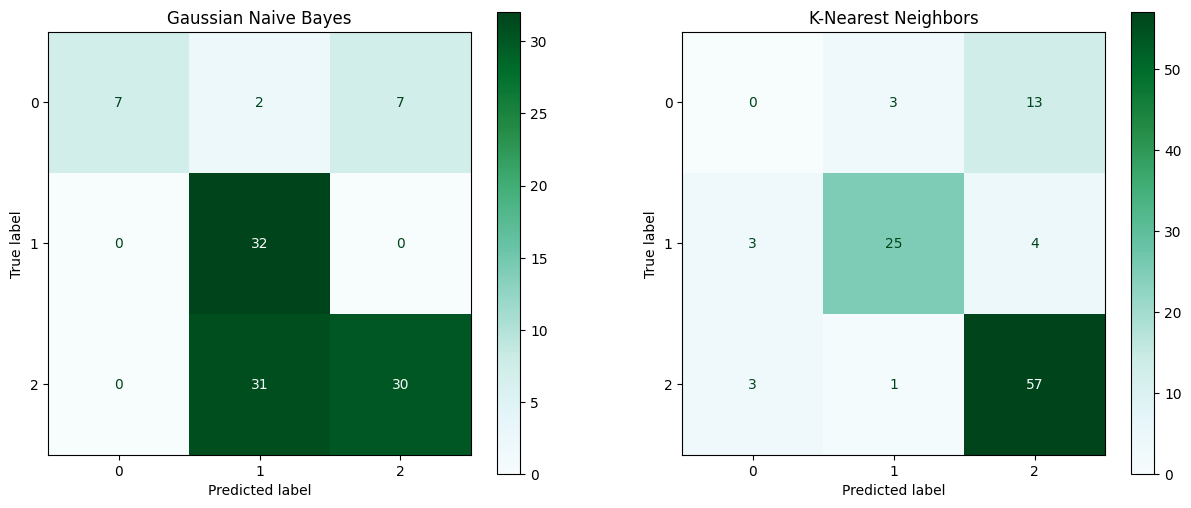

In [ ]:
gnb_model = GaussianNaiveBayes()
gnb_model.fit(X_train, y_train)
gnb_predictions = gnb_model.predict(X_test)

knn_model = KNearestNeighbor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

gnb_cm = confusion_matrix(y_test, gnb_predictions)
knn_cm = confusion_matrix(y_test, knn_predictions)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='BuGn')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")

knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='BuGn')
knn_cm_display.ax_.set_title("K-Nearest Neighbors")

plt.show()

Output di atas menunjukkan bahwa algoritma KNN lebih baik dalam mengklasifikasikan data dibandingkan dengan Gaussian Naive Bayes. Hal ini dapat dilihat dari nilai diagonal pada matriks yang menunjukkan bahwa KNN dapat mengklasifikasikan lebih banyak data dengan benar.

####**Evaluation Metrics**

#####**Gaussian Naive Bayes**

Accuracy: 0.6330275229357798
Precision: 0.7677061677061677
Recall: 0.6431010928961749
F1 Score: 0.6269114548553621
ROC-AUC Score: 0.9432348528726107


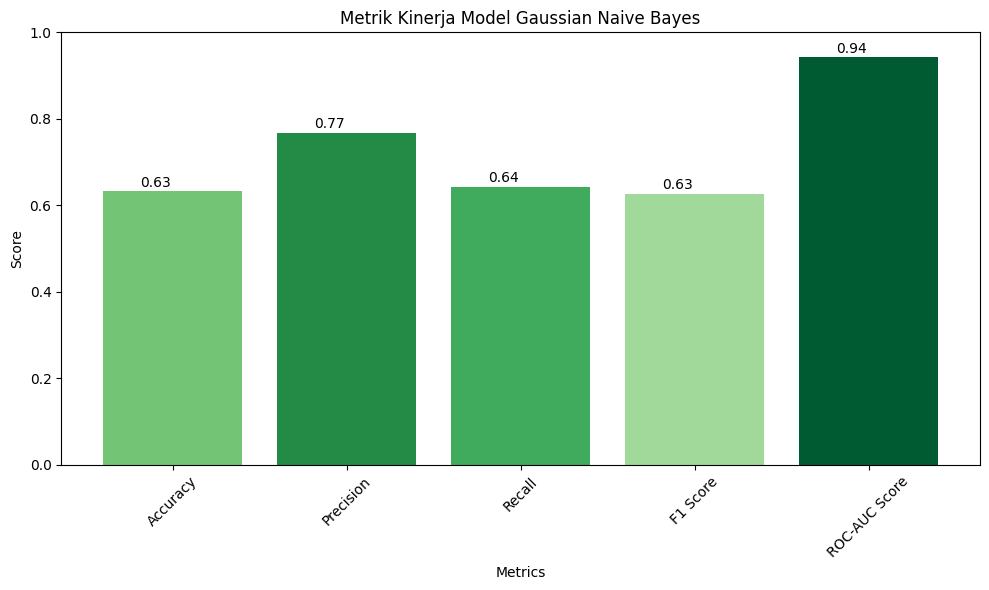

In [ ]:
gnb_model = GaussianNaiveBayes()
gnb_model.fit(X_train, y_train)

predictions = gnb_model.predict(X_test)
gnb_probs = gnb_model.predict_proba(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
roc_score = roc_auc_score(y_test, gnb_probs, multi_class='ovr')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_score)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC Score']
scores = [accuracy, precision, recall, f1, roc_score]

colors = ['#74c476', '#238b45', '#41ab5d', '#a1d99b', '#005a32']
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, scores, color=colors)
plt.title('Metrik Kinerja Model Gaussian Naive Bayes')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.0)

for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{score:.2f}', ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

Output di atas menunjukkan evaluasi performa model Gaussian Naive Bayes pada data uji. Dalam hal ini, model tersebut mencapai akurasi sebesar 0.63, presisi sebesar 0.77, recall sebesar 0.64, F1 Score sebesar 0.63, dan ROC-AUC Score sebesar 0.94. Ini menunjukkan bahwa model tersebut memiliki performa yang cukup baik dalam mengklasifikasikan data uji.

#####**K-Nearest Neighbor**

Accuracy: 0.7522935779816514
Precision: 0.5441130785958372
Recall: 0.5718920765027322
F1 Score: 0.5547055251973284
ROC-AUC Score: 0.7762369817003608


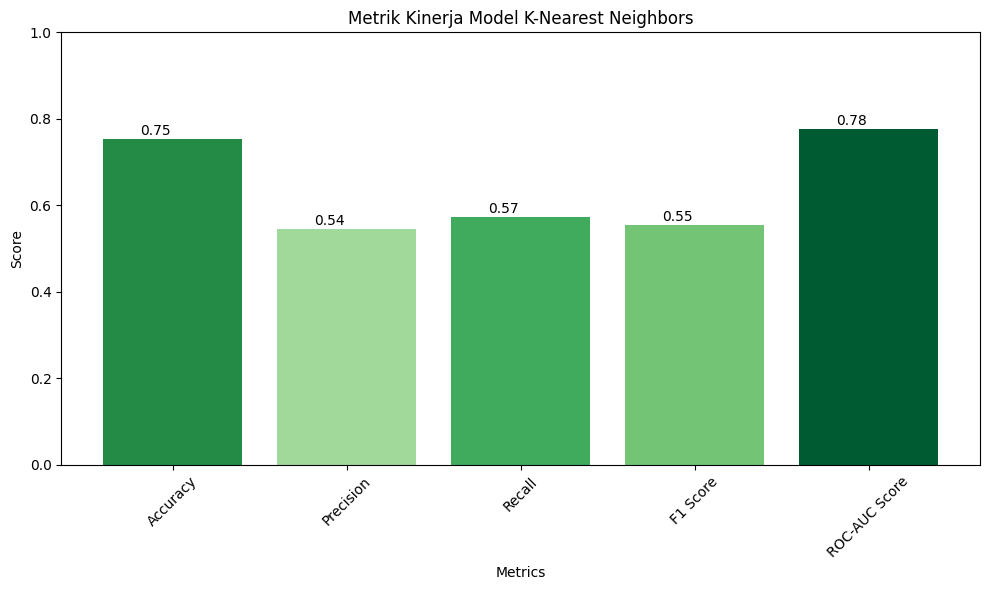

In [ ]:
knn_model = KNearestNeighbor()
knn_model.fit(X_train, y_train)

predictions = knn_model.predict(X_test)
knn_probs = knn_model.predict_proba(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
roc_score = roc_auc_score(y_test, knn_probs, multi_class='ovr')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_score)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC Score']
scores = [accuracy, precision, recall, f1, roc_score]

plt.figure(figsize=(10, 6))
colors = ['#238b45', '#a1d99b', '#41ab5d', '#74c476', '#005a32']
bars = plt.bar(metrics, scores, color=colors)
plt.title('Metrik Kinerja Model K-Nearest Neighbors')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.0)

for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{score:.2f}', ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

Output di atas menunjukkan evaluasi performa model K-Nearest Neighbors pada data uji. Model ini memiliki akurasi sebesar 0.75, presisi sebesar 0.54, recall sebesar 0.57, dan F1 Score sebesar 0.55. Selain itu, ROC-AUC Score-nya adalah 0.78, menunjukkan performa yang cukup baik dalam mengklasifikasikan data uji, terutama dalam hal pengukuran keseluruhan performa model.

####**ROC Curve**

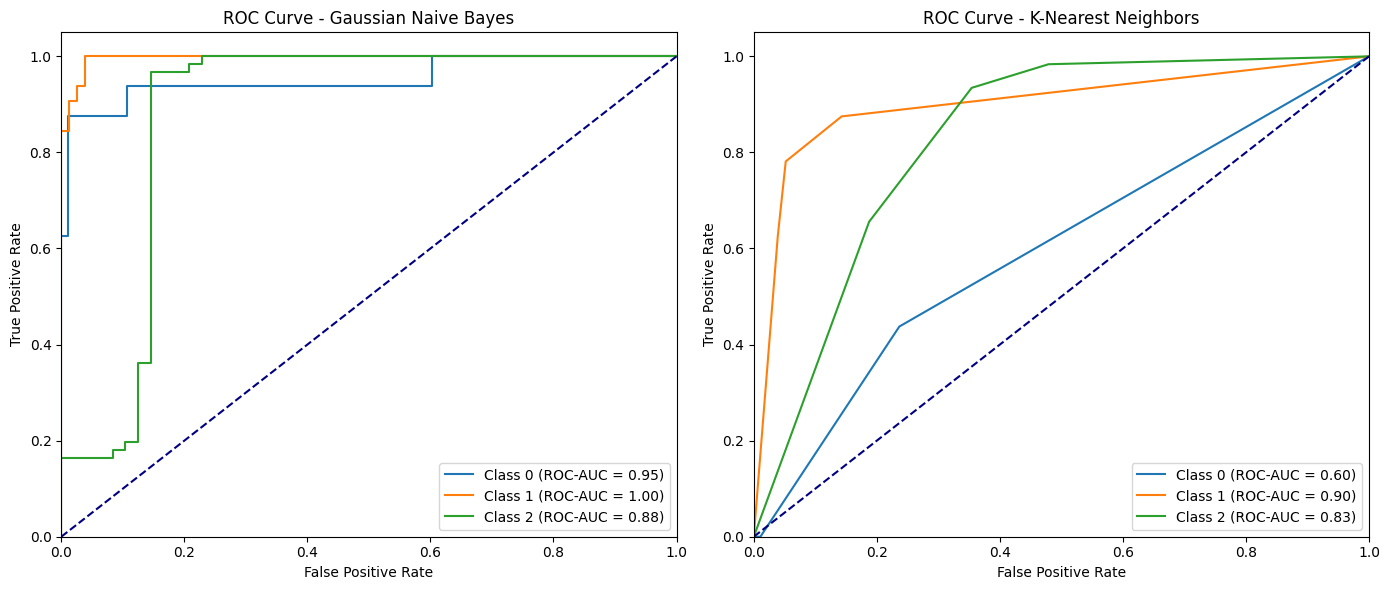

In [ ]:
models = [GaussianNaiveBayes(), KNearestNeighbor()]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for model, name, ax in zip(models, model_names, axes):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)

    if len(np.unique(y_train)) > 2:
        unique_classes = np.unique(y_train)
        for i in range(len(unique_classes)):
            fpr, tpr, _ = roc_curve(y_test == unique_classes[i], y_pred_proba[:, i])
            roc_auc = roc_auc_score(y_test == unique_classes[i], y_pred_proba[:, i])
            ax.plot(fpr, tpr, label=f'Class {unique_classes[i]} (ROC-AUC = {roc_auc:.2f})')

    else:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
        roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        ax.plot(fpr, tpr, label=f'{name} (ROC-AUC = {roc_auc:.2f})')

    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

Output di atas menunjukkan hasil analisis ROC, yang mana model Gaussian Naive Bayes menunjukkan kinerja yang lebih baik daripada model KNN untuk klasifikasi data dalam gambar tersebut. Model Gaussian Naive Bayes mampu membedakan dengan sangat baik antara kelas 0 dan kelas 1, dan masih dapat membedakan antara kelas 2 dan kelas 0 atau kelas 1. Model KNN juga menunjukkan kinerja yang baik, tetapi tidak sebaik Gaussian Naive Bayes untuk kelas 0 dan kelas 1.

###**Review Process**

####**Cross Validation**

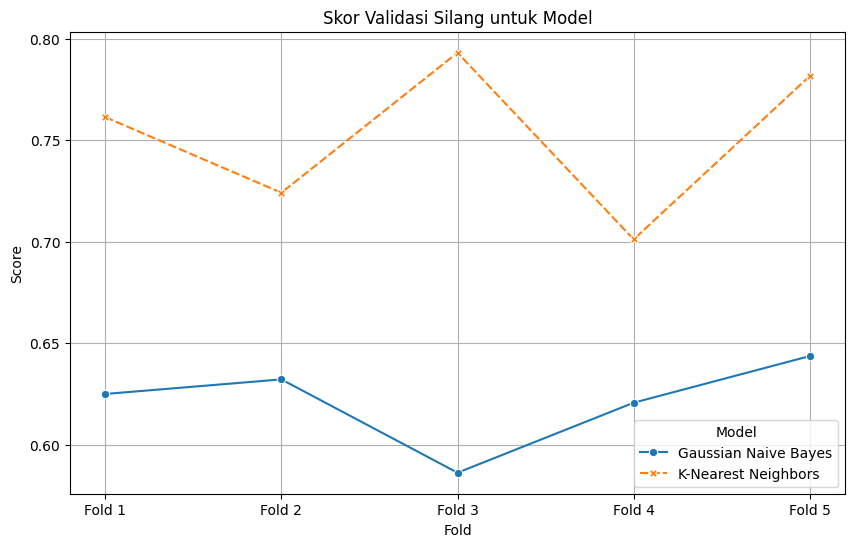

In [ ]:
models = [GaussianNaiveBayes(), KNearestNeighbor()]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors']

cv_scores = []
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_scores.append(scores)

df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Skor Validasi Silang untuk Model')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()


Output di atas menunjukkan bahwa Gaussian Naive Bayes adalah model yang lebih baik untuk tugas klasifikasi yang diwakili dalam grafik. Hal ini karena Gaussian Naive Bayes memiliki kinerja yang lebih baik secara keseluruhan dan lebih konsisten dalam kinerjanya di semua lipatan.

####**Feature Selection**

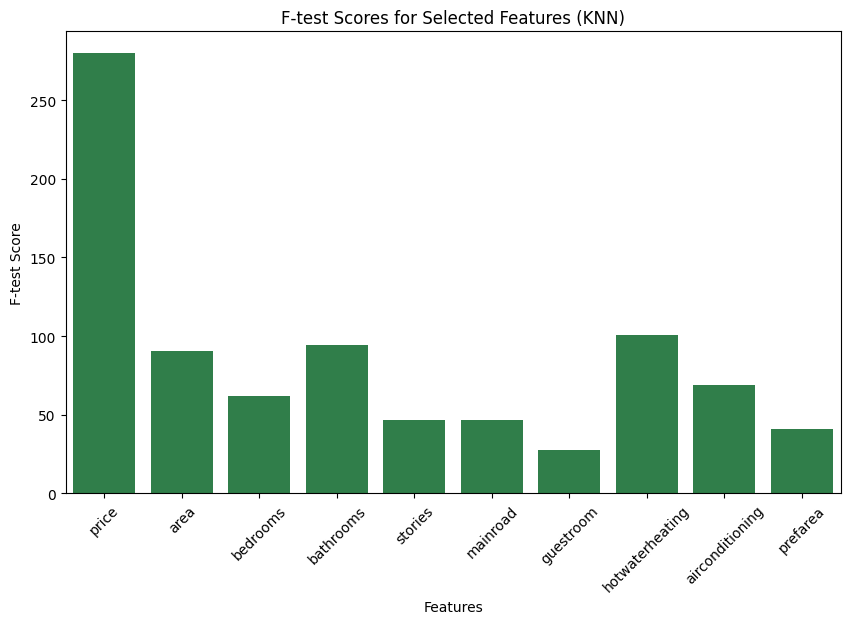

In [ ]:
selector = SelectKBest(score_func=f_classif)
selector.fit(X_train, y_train)

selected_feature_indices = selector.get_support(indices=True)
selected_features = X_train.columns[selected_feature_indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=selected_features, y=selector.scores_[selected_feature_indices], color='#238b45')
plt.title("F-test Scores for Selected Features (KNN)")
plt.xlabel("Features")
plt.ylabel("F-test Score")
plt.xticks(rotation=45)
plt.show()

Output di atas menunjukkan fitur - fitur yang berpengaruh terhadap analisis. Terlihat bahwa kolom "price" yang sangat berpengaruh dalam klasifikasi kategori rumah.

###**Tuning Hyperparameter**

####**Gaussian Naive Bayes**

Akurasi sebelum tuning: 0.6330275229357798
Akurasi setelah tuning: 0.9357798165137615


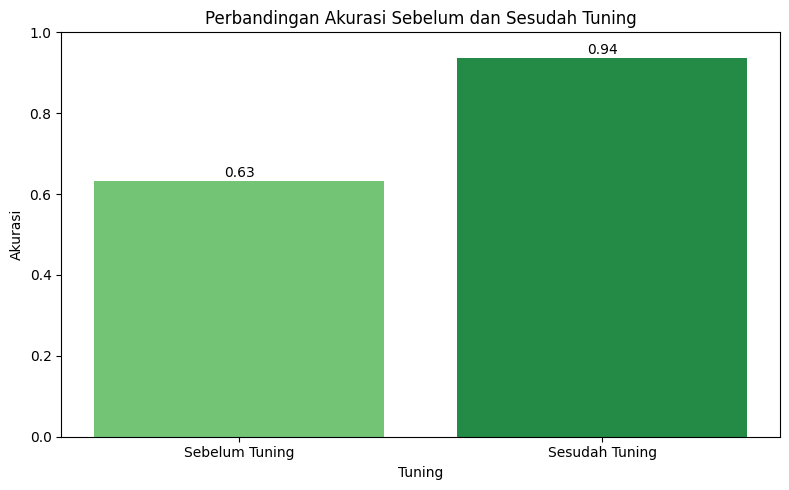

In [ ]:
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

grid_search = GridSearchCV(estimator=GaussianNaiveBayes(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred_tuned = grid_search.best_estimator_.predict(X_test)

acc_before_tuning = gnb_model.score(X_test, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(X_test, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

labels = ['Sebelum Tuning', 'Sesudah Tuning']
accuracies = [acc_before_tuning, acc_after_tuning]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, accuracies, color=['#74c476', '#238b45'])
plt.title('Perbandingan Akurasi Sebelum dan Sesudah Tuning')
plt.xlabel('Tuning')
plt.ylabel('Akurasi')
plt.ylim(0, 1)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{acc:.2f}', ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

Output di atas menunjukkan akurasi model Gaussian Naive Bayes sebelum dan sesudah tuning, terlihat bahwa akurasi tuning meningkat yang berarti adanya peningkatan yang signifikan dalam performa model setelah melakukan tuning parameter.

####**K-Nearest Neighbor**

Akurasi sebelum tuning: 0.8990825688073395
Akurasi setelah tuning: 0.7614678899082569


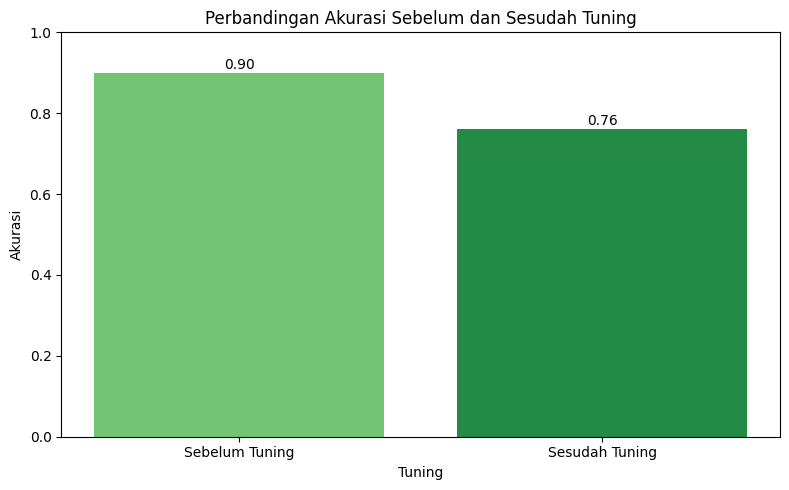

In [ ]:
param_grid = {
    'k': [1, 3, 5, 7, 9]
}

grid_search = GridSearchCV(estimator=KNearestNeighbor(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred_tuned = grid_search.best_estimator_.predict(X_test)

acc_before_tuning = knn_pipeline.score(X_test, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(X_test, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

labels = ['Sebelum Tuning', 'Sesudah Tuning']
accuracies = [acc_before_tuning, acc_after_tuning]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, accuracies, color=['#74c476', '#238b45'])
plt.title('Perbandingan Akurasi Sebelum dan Sesudah Tuning')
plt.xlabel('Tuning')
plt.ylabel('Akurasi')
plt.ylim(0, 1)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{acc:.2f}', ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

Output di atas menunjukkan akurasi model K-Nearest Neighbor sebelum dan sesudah tuning, terlihat bahwa akurasi tuning menurun yang berarti adanya penurunan dalam performa model setelah melakukan tuning parameter.

##**Determine Next Steps**

Dari hasil evaluasi yang telah dilakukan, langkah selanjutnya adalah melakukan pemilihan model yang optimal untuk klasifikasi kategori rumah berdasarkan fitur-fitur properti. Berdasarkan analisis, model **Gaussian Naive Bayes** menunjukkan akurasi yang cukup baik dengan performa yang stabil dalam cross-validation. Selain itu, dilakukan tuning hyperparameter untuk memperbaiki performa model, dimana akurasi setelah tuning mengalami peningkatan yang signifikan. Langkah berikutnya adalah menerapkan model Gaussian Naive Bayes yang telah dioptimalkan untuk memprediksi kategori furnishing berdasarkan fitur-fitur yang telah dikelompokkan sebelumnya menggunakan algoritma K-Means clustering.

#**DEPLOYMENT**

##**Generate Model**



In [ ]:
model = GaussianNaiveBayes()
model.fit(X_train, y_train)

filename = 'gnb.sav'
pickle.dump(model, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))

Kode di atas digunakan untuk mengenerate model algoritma yang akan di deployment menggunakan Streamlit dengan format .sav.